## Backend 

V temu delu bom izvajal osnovne operacije nad podatki.

### Podatki

Opis podatkovne zbirke MovieLens ostaja enak prvi nalogi.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
#reading the CSV file

#read the data and split by ","
data = pd.read_csv('podatki/student_data.csv', sep=",", encoding="windows-1250")

#cut data sex, age, address, Pstatus, Medu, Fedu, reason, guardian, traveltime, studytime, schoolsup, famsup, paid, activities, nursery, internet, famrel, freetime, goout, Dalc, Walc, health, absences
cut = ['sex', 'age', 'address', 'Pstatus', 'Medu', 'Fedu', 'reason', 'guardian', 'traveltime', 'studytime', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'internet', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

for a in cut:
    data = data.drop(a, 1)

%store data

Stored 'data' (DataFrame)


C:\Users\pritr\AppData\Local\Temp/ipykernel_26964/1710200204.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop(a, 1)


In [3]:
#show the head of the data
data.head()

,school,famsize,Mjob,Fjob,failures,higher,romantic,G1,G2,G3
0,GP,GT3,at_home,teacher,0,yes,no,5,6,6
1,GP,GT3,at_home,other,0,yes,no,5,5,6
2,GP,LE3,at_home,other,3,yes,no,7,8,10
3,GP,GT3,health,services,0,yes,yes,15,14,15
4,GP,GT3,other,other,0,yes,no,6,10,10


In [4]:
#show the tail of the data
data.tail()

,school,famsize,Mjob,Fjob,failures,higher,romantic,G1,G2,G3
390,MS,LE3,services,services,2,yes,no,9,9,9
391,MS,LE3,services,services,0,yes,no,14,16,16
392,MS,GT3,other,other,3,yes,no,10,8,7
393,MS,LE3,services,other,0,yes,no,11,12,10
394,MS,LE3,other,at_home,0,yes,no,8,9,9


In [5]:
print(data.shape)

(395, 10)


In [6]:
data.dtypes

school      object
famsize     object
Mjob        object
Fjob        object
failures     int64
higher      object
romantic    object
G1           int64
G2           int64
G3           int64
dtype: object

Text(0.5, 1.0, 'Število študentov glede na vrsto šole')

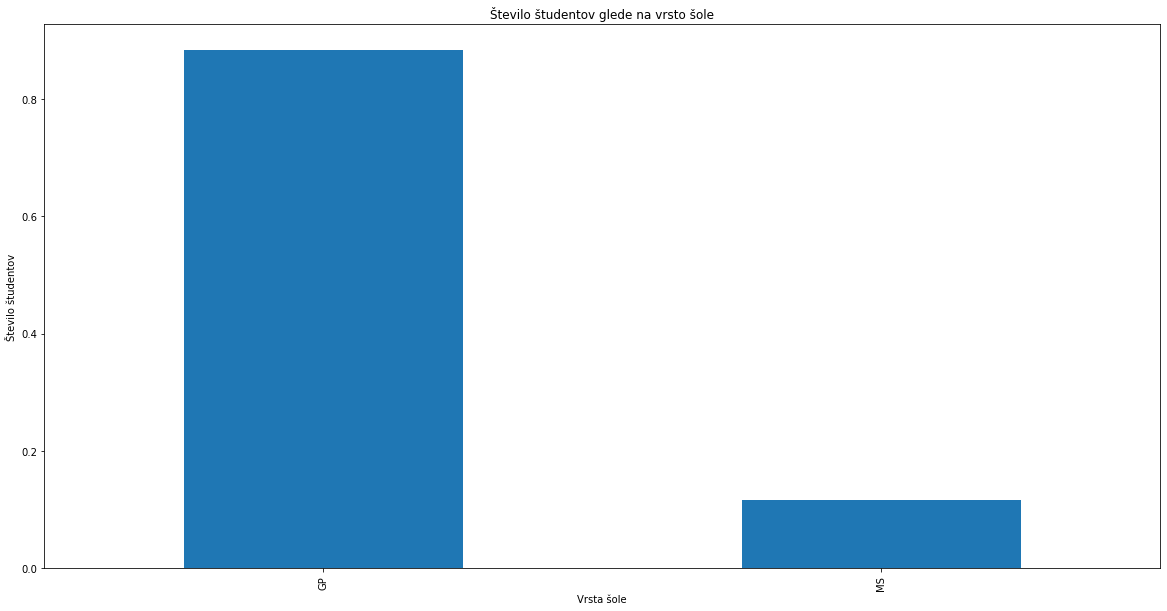

In [7]:
#get school type and plot number of recordings based on school type

plt.figure(figsize=(20,10))
plt.ascending = True
data.school.value_counts(normalize=True).plot(kind='bar')
plt.ylabel('Število študentov')
plt.xlabel('Vrsta šole')
plt.title('Število študentov glede na vrsto šole')

Text(0.5, 1.0, 'Povprečna ocena glede na vrsto šole')

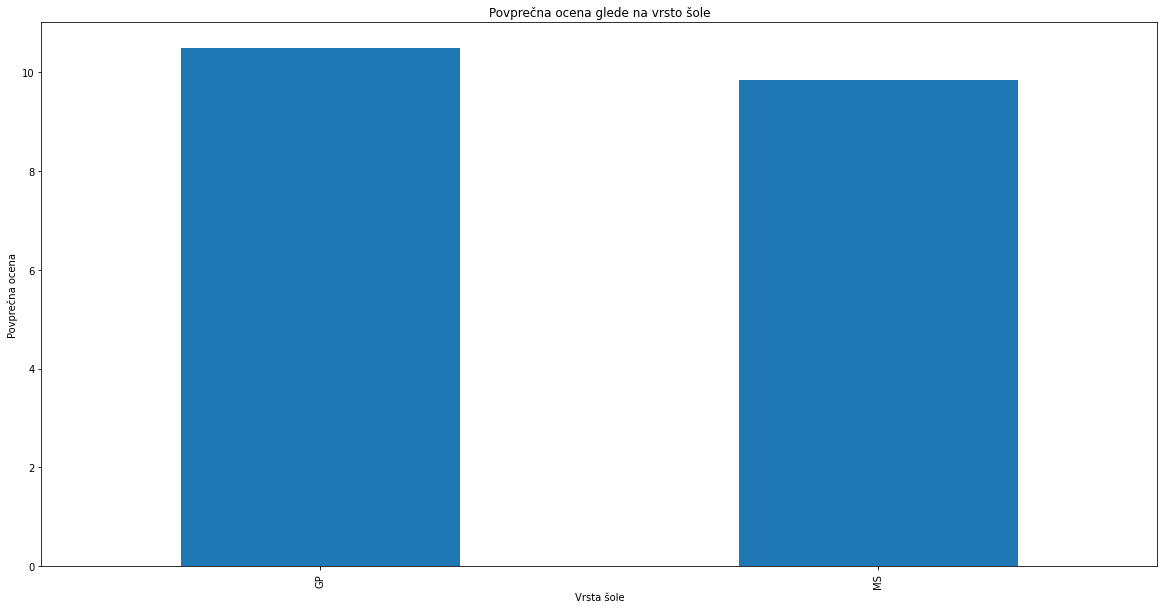

In [8]:
#get average grade for each school type

plt.figure(figsize=(20,10))
data.groupby('school')['G3'].mean().plot(kind='bar')
plt.ylabel('Povprečna ocena')
plt.xlabel('Vrsta šole')
plt.title('Povprečna ocena glede na vrsto šole')



Text(0.5, 1.0, 'Povprečna ocena glede na zaposlitev staršev')

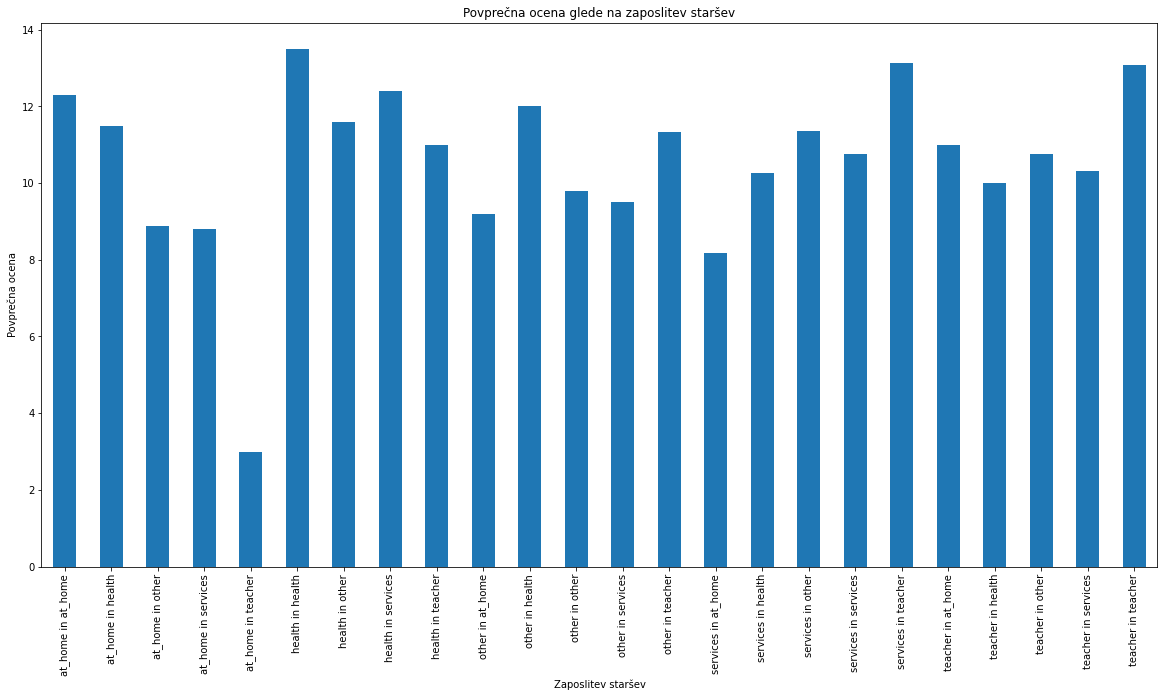

In [9]:
#combine the mothers and fathers job

data['M+FJob'] = data['Mjob'] + ' in ' + data['Fjob']

#use the data['M+FJob'] to get the average grade for each job combination

plt.figure(figsize=(20,10))
plt.ascending = True
data.groupby('M+FJob')['G3'].mean().plot(kind='bar')
plt.ylabel('Povprečna ocena')
plt.xlabel('Zaposlitev staršev')
plt.title('Povprečna ocena glede na zaposlitev staršev')




Text(0.5, 1.0, 'Distribucija zaposlitev staršev')

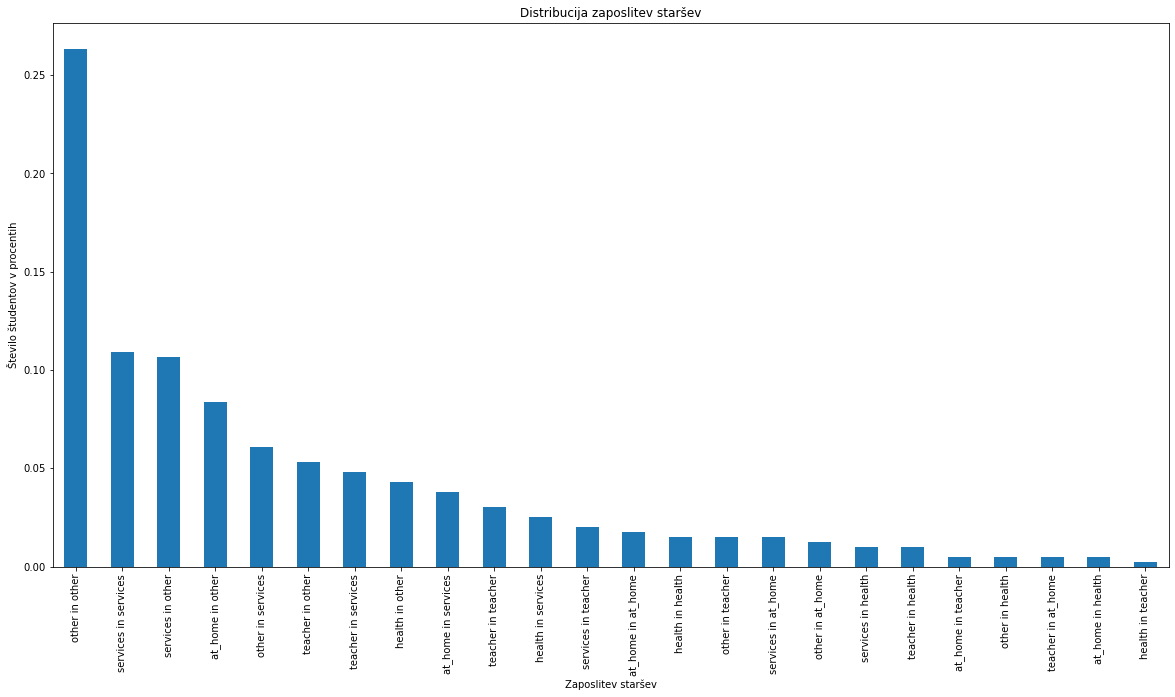

In [10]:
#distriubtion of mother and father jobs using percentage

plt.figure(figsize=(20,10))
plt.ascending = True
data['M+FJob'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('Število študentov v procentih')
plt.xlabel('Zaposlitev staršev')
plt.title('Distribucija zaposlitev staršev')



Text(0.5, 1.0, 'Povprečna ocena glede na število neuspešnih let')

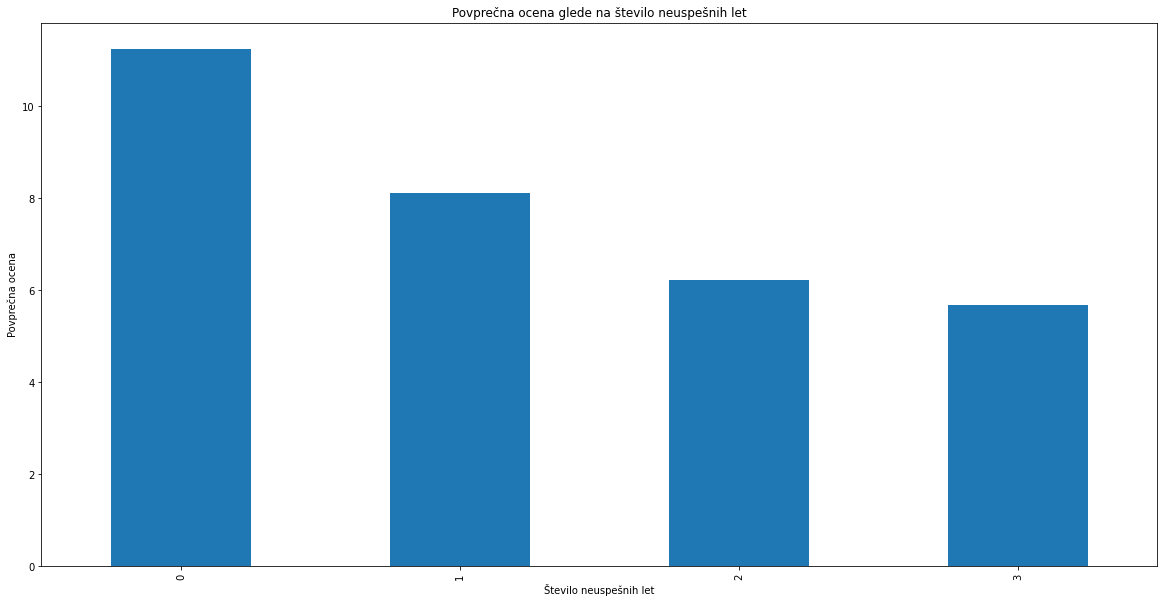

In [11]:
#show the number of past failiures and the 
#average grade for each number of past failures

plt.figure(figsize=(20,10))
plt.ascending = True
data.groupby('failures')['G3'].mean().plot(kind='bar')
plt.ylabel('Povprečna ocena')
plt.xlabel('Število neuspešnih let')
plt.title('Povprečna ocena glede na število neuspešnih let')


Text(0.5, 1.0, 'Število neuspešnih let glede na romantično zvezo')

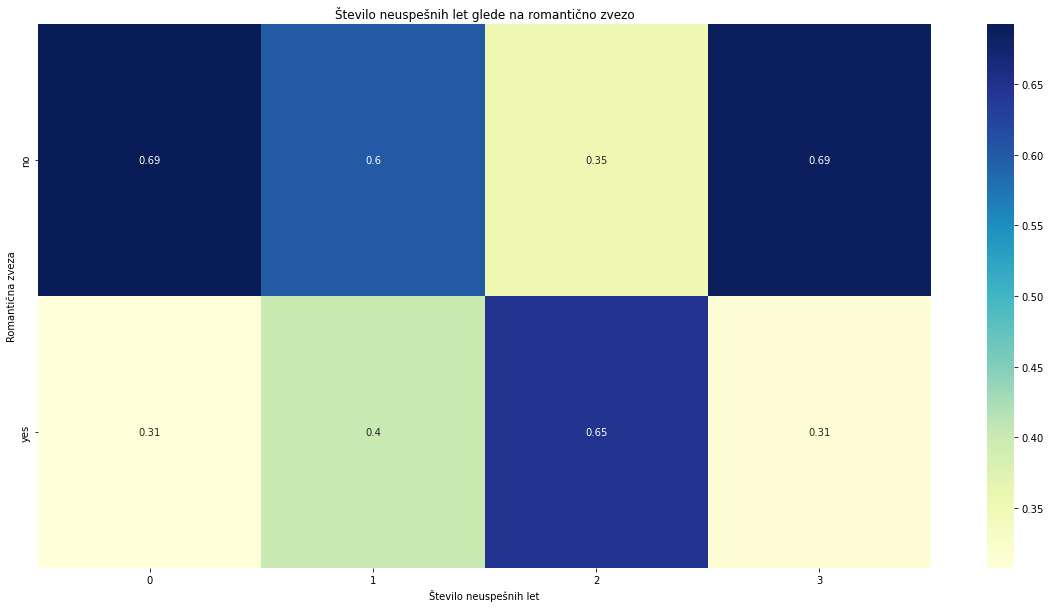

In [12]:
#Show the number of failiures by if the student is in a romantic relationship where relationship in different colors using heatmap

plt.figure(figsize=(20,10))
plt.ascending = True
ct = pd.crosstab(data['romantic'], data['failures'], normalize='columns')
sns.heatmap(ct, annot=True, cmap="YlGnBu")
plt.ylabel('Romantična zveza')
plt.xlabel('Število neuspešnih let')
plt.title('Število neuspešnih let glede na romantično zvezo')




Text(0.5, 1.0, 'Želja za višjo izobrazbo glede na število članov družine')

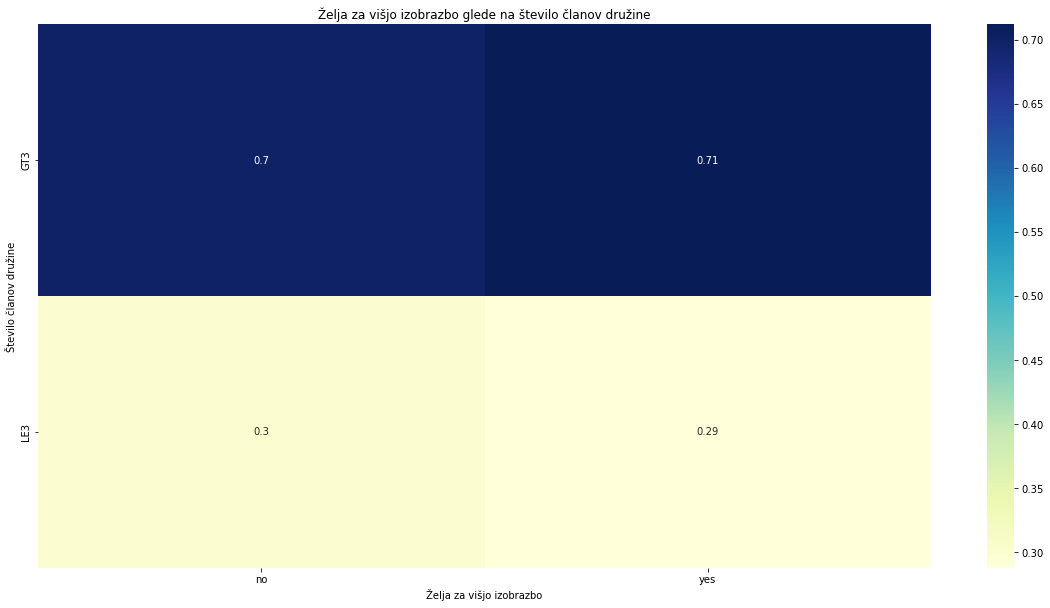

In [13]:
#Distribution of students that want higher education by family size

plt.figure(figsize=(20,10))
plt.ascending = True
ct = pd.crosstab(data['famsize'], data['higher'], normalize='columns')
sns.heatmap(ct, annot=True, cmap="YlGnBu")
plt.ylabel('Število članov družine')
plt.xlabel('Želja za višjo izobrazbo')
plt.title('Želja za višjo izobrazbo glede na število članov družine')


Text(0.5, 1.0, 'Povprečna ocena glede na željo po višji izobrazbi')

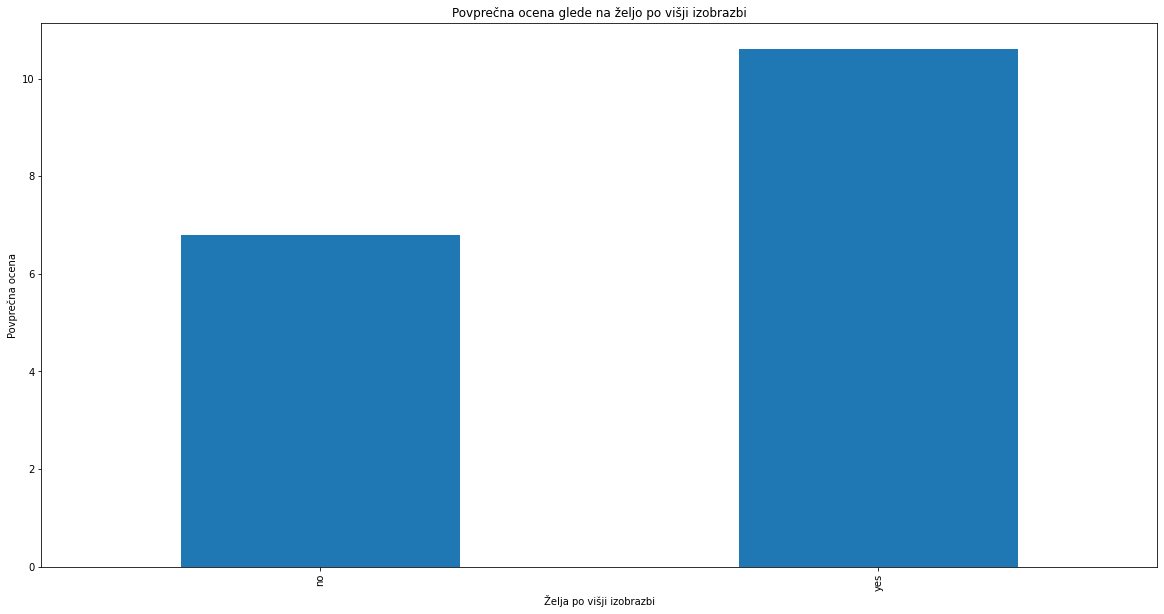

In [14]:
#Distribution between average grade and if they want higher education

plt.figure(figsize=(20,10))
plt.ascending = True
data.groupby('higher')['G3'].mean().plot(kind='bar')
plt.ylabel('Povprečna ocena')
plt.xlabel('Želja po višji izobrazbi')
plt.title('Povprečna ocena glede na željo po višji izobrazbi')
